## Pandas time series
A series or dataframe using a datetime index instead of a range index.

Used for storing events/data that fits on a timeline.
- Weather data.
- Temperature readings.
- Heart rate monitoring (EKG).
- Quarterly sales.
- Stock prices.

In [1]:
import pandas as pd
import numpy as np

### Creating a datetimeindex
Use date_range() with 3 of the 4 parameters:
- start
- end
- periods
- freq

In [22]:
datetimeindex = pd.date_range(start='2018-01-01', end='2019-12-31', freq="D")
datetimeindex

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [35]:
df = pd.DataFrame(
    dict(
        n = range(len(datetimeindex)),
        rand = np.random.random(len(datetimeindex))
    ),
    index=datetimeindex
)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       730 non-null    int64  
 1   rand    730 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 33.3 KB


In [34]:
df.loc["2018-03-15"]
df.loc[:"2018-01-15"]
df.loc["2018-03-15":"2018-03-20"]
df.loc["2018-03"]
df.loc["2019"]
df.loc["2019-03-29":"2019-05"]

,n,rand
2019-03-29,452,0.277300
2019-03-30,453,0.612097
2019-03-31,454,0.738044
2019-04-01,455,0.613258
2019-04-02,456,0.064672
...,...,...
2019-05-27,511,0.058865
2019-05-28,512,0.305488
2019-05-29,513,0.407736
2019-05-30,514,0.758114


### Resampling
Resampling is the practice of creating new samples with a lower or higher frequency than the original data.

#### Downsampling
When the sample frequency is lower than the orignal we can aggregate values from the original data.

In [44]:
from helpers import hdisplay

resample_method = "Y"

hdisplay([
    df.head(10),
    df.resample(resample_method).agg({"n": "max", "rand": "sum"}).head(10)],
    ["Orignal", f"Resampled using '{resample_method}'"]
)

,n,rand
2018-01-01 00:00:00,0,0.284395
2018-01-02 00:00:00,1,0.710964
2018-01-03 00:00:00,2,0.634303
2018-01-04 00:00:00,3,0.627769
2018-01-05 00:00:00,4,0.248145
2018-01-06 00:00:00,5,0.506077
2018-01-07 00:00:00,6,0.315071
2018-01-08 00:00:00,7,0.350274
2018-01-09 00:00:00,8,0.143970
2018-01-10 00:00:00,9,0.981547


#### Upsampling
When the sample frequency is higher than the original, we can fill between values:
- ffill
- bfill
- nearest
- interpolation
- fillna

In [63]:
resample_method = "6H"

hdisplay([
    df.head(10),
    df.resample(resample_method).max().fillna(df[["n", "rand"]].mean()).head(10)],
    ["Orignal", f"Resampled using '{resample_method}'"]
)

,n,rand
2018-01-01 00:00:00,0,0.284395
2018-01-02 00:00:00,1,0.710964
2018-01-03 00:00:00,2,0.634303
2018-01-04 00:00:00,3,0.627769
2018-01-05 00:00:00,4,0.248145
2018-01-06 00:00:00,5,0.506077
2018-01-07 00:00:00,6,0.315071
2018-01-08 00:00:00,7,0.350274
2018-01-09 00:00:00,8,0.143970
2018-01-10 00:00:00,9,0.981547


## Working on real data

In [91]:
apple = pd.read_csv("../Data/HistoricalData_Apple.csv", parse_dates=["Date"], index_col="Date")
apple.rename(columns={"Close/Last": "Close"}, inplace=True)

to_int_columns = ["Close", "Open", "High", "Low"]

apple[to_int_columns] = apple[to_int_columns].map(lambda value: value.replace("$", "")).astype("float64")  #.replace("[\$,]", "", regex=True).astype(float)

#apple = apple.astype({col: "float64" for col in to_int_columns})

apple.sort_index(inplace=True)

apple

,Close,Volume,Open,High,Low
Date,,,,,
2013-11-11,18.5374,226990197,18.5711,18.6311,18.3718
2013-11-12,18.5718,204271118,18.4882,18.7114,18.4643
2013-11-13,18.5941,196615949,18.5000,18.6518,18.4629
2013-11-14,18.8629,281606247,18.6718,18.9029,18.6382
2013-11-15,18.7497,317359713,18.8064,18.8961,18.7318
...,...,...,...,...,...
2023-11-03,176.6500,79829250,174.2400,176.8200,173.3500
2023-11-06,179.2300,63841310,176.3800,179.4300,176.2100
2023-11-07,181.8200,70529970,179.1800,182.4400,178.9700


In [111]:
#pd.set_option("display.float_format", '{:.2f}'.format)
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

apple.loc["2018", "Close"].mean()
apple.resample("Y").mean()

,Close,Volume,Open,High,Low
Date,,,,,
2013-12-31,19.51,305.95M,19.50,19.65,19.38
2014-12-31,23.07,251.68M,23.05,23.25,22.87
2015-12-31,30.01,206.59M,30.04,30.31,29.72
2016-12-31,26.15,153.07M,26.13,26.36,25.92
2017-12-31,37.64,108.01M,37.61,37.85,37.37
2018-12-31,47.26,135.07M,47.28,47.75,46.80
2019-12-31,52.06,112.24M,51.97,52.46,51.57
2020-12-31,95.35,157.62M,95.27,96.66,93.91
2021-12-31,140.99,90.54M,140.86,142.35,139.47


<Axes: xlabel='Date', ylabel='Open'>

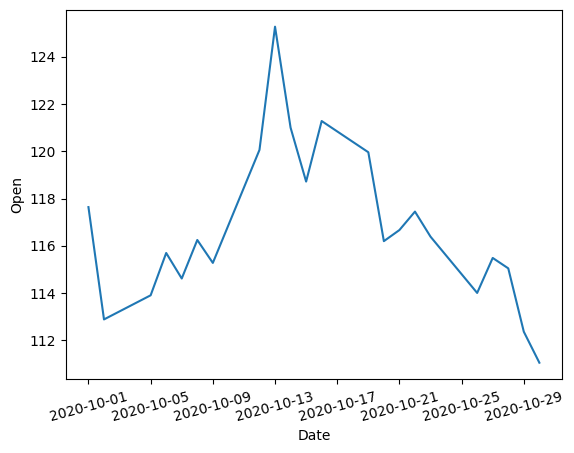

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

data = apple.loc["2020-10"]
#data = apple.loc["2020"].resample("M").mean()
#data = apple.resample("QS").mean()
plt.xticks(rotation=15)
sns.lineplot(data=data, x=data.index, y="Open")